## News popularity research project. 


## Данные

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

# news_final = pd.read_csv('News_Final.csv')
with zipfile.ZipFile('News_Final.csv.zip') as z:
    with z.open('News_Final.csv') as f:
        news_final = pd.read_csv(f)

obama_facebook = pd.read_csv('Facebook_Obama.csv')
obama_googleplus = pd.read_csv('GooglePlus_Obama.csv')
obama_linkedin = pd.read_csv('LinkedIn_Obama.csv')

economy_facebook = pd.read_csv('Facebook_Economy.csv')
economy_googleplus = pd.read_csv('GooglePlus_Economy.csv')
economy_linkedin = pd.read_csv('LinkedIn_Economy.csv')

microsoft_facebook = pd.read_csv('Facebook_Microsoft.csv')
microsoft_googleplus = pd.read_csv('GooglePlus_Microsoft.csv')
microsoft_linkedin = pd.read_csv('LinkedIn_Microsoft.csv')

palestine_facebook = pd.read_csv('Facebook_Palestine.csv')
palestine_googleplus = pd.read_csv('GooglePlus_Palestine.csv')
palestine_linkedin = pd.read_csv('LinkedIn_Palestine.csv')



In [4]:
news_obama = news_final[news_final.Topic == 'obama']
news_economy = news_final[news_final.Topic == 'economy']
news_microsoft = news_final[news_final.Topic == 'microsoft']
news_palestine = news_final[news_final.Topic == 'palestine']

Далее будем работать только с теми новостями из news_final, которые присутствуют в специализованных, то есть уберем заглушки 

In [5]:
p1 = palestine_facebook.IDLink.unique()
p2 = palestine_googleplus.IDLink.unique()
p3 = palestine_linkedin.IDLink.unique()
p_id = np.concatenate((p1, p2, p3), axis=0)
p_id = np.unique(p_id)

news_palestine = news_palestine[news_palestine['IDLink'].isin(p_id)]
news_palestine

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
6,80690.0,"Monday, 29 Feb 2016","RAMALLAH, February 25, 2016 (WAFA) - Palestine...",NaN,palestine,2016-02-28 14:03:00,0.000000,-0.005906,0,0,0
56,81052.0,"Monday, 29 Feb 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",NaN,palestine,2016-03-01 09:29:00,0.000000,0.048546,0,0,0
111,80994.0,"Tuesday, 1 Mar 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",NaN,palestine,2016-03-01 00:15:00,-0.243068,0.048546,0,0,0
3062,61983.0,Palestines Fastest and Most Furious,Noor Daoud is a female professional drift race...,Daily Beast,palestine,2015-11-17 00:00:00,-0.086958,-0.159901,-1,-1,-1
3063,61987.0,Midlothian couple killed in mass murder near P...,But Kamp recently purchased a rural parcel of ...,WFAA,palestine,2015-11-17 00:00:00,-0.132583,-0.124226,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...
93191,104773.0,Palestine—Quartet and Two-State Solution Sink ...,Such acts of recognition by the international ...,Canada Free Press,palestine,2016-07-07 12:31:20,0.079057,-0.303170,3,0,0
93213,104782.0,Ugandan President Repeatedly Refers To Israel ...,"However, Netanyahu's emotional speech was marr...",The Inquisitr,palestine,2016-07-07 13:45:21,-0.044194,-0.236585,6,1,1
93233,104799.0,Tournoi de foot solidaire pour la Palestine,Dans le cadre de la campagne annuelle de solid...,L'Humanité,palestine,2016-07-07 15:20:27,-0.047246,-0.106600,4,0,0
93236,104793.0,Palestinian Government Uses Foreign Aid To Pay...,The Palestinian government spends nearly $140 ...,Daily Caller,palestine,2016-07-07 15:38:26,0.291667,-0.139754,5,1,0


In [6]:
o1 = obama_facebook.IDLink.unique()
o2 = obama_googleplus.IDLink.unique()
o3 = obama_linkedin.IDLink.unique()
o_id = np.concatenate((o1, o2, o3), axis=0)
o_id = np.unique(o_id)

news_obama = news_obama[news_obama['IDLink'].isin(o_id)]
news_obama

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
3051,61930.0,Paris Attacks Complicate Hillary Clinton's Ali...,In her pursuit of the Democratic nomination fo...,New York Times,obama,2015-11-17 00:00:00,-0.033146,0.109109,-1,-1,-1
3052,61933.0,Obama: I didn't appreciate how weak the presid...,One big thing Barack Obama has learned about b...,Vox,obama,2015-11-17 00:00:00,0.024056,0.057639,-1,-1,-1
3053,61945.0,Obama: Delusional or something worse?,That's how Bill O'Reilly led his Fox News show...,WND.com,obama,2015-11-17 00:00:00,0.000000,-0.193129,-1,-1,-1
3054,61946.0,Trump: Obama sending refugees to Republican st...,The Obama administration is deliberately sendi...,Politico,obama,2015-11-17 00:00:00,-0.047246,-0.022097,-1,-1,-1
3055,61947.0,"Invited By Obama To 'Pop Off,' John McCain Jus...",Republican Sen. John McCain critiqued Presiden...,NPR,obama,2015-11-17 00:00:00,-0.220899,0.027951,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...
93193,104792.0,"Putin Called Obama to Discuss Syria, Ukraine a...",Russian President Vladimir Putin phoned U.S. c...,Newsweek,obama,2016-07-07 12:40:18,0.000000,-0.062889,2,0,1
93210,104787.0,Poland Rushes Vote to Unblock Top Court Before...,The government was pressing to amend the rules...,ABC News,obama,2016-07-07 13:40:14,0.128468,0.251558,2,0,1
93212,104784.0,Why Did Obama Do so Well at the Supreme Court?,The last week of the Supreme Court's last full...,New Republic,obama,2016-07-07 13:43:14,0.000000,-0.002083,4,0,0
93218,104788.0,"Despite Obama's new executive order, US drone ...","In 2013, President Obama promised to bring gre...",Washington Post,obama,2016-07-07 14:05:15,-0.229171,-0.163486,9,0,1


In [7]:
m1 = microsoft_facebook.IDLink.unique()
m2 = microsoft_googleplus.IDLink.unique()
m3 = microsoft_linkedin.IDLink.unique()
m_id = np.concatenate((m1, m2, m3), axis=0)
m_id = np.unique(m_id)

news_microsoft = news_microsoft[news_microsoft['IDLink'].isin(m_id)]
news_microsoft

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
706,121.0,"Microsoft's Stock Math: Fewer Shares, Pricier ...","Microsoft has been on a roll. Late last month,...",New York Times,microsoft,2015-11-08 00:00:00,0.047246,-0.237671,-1,-1,-1
707,131.0,Why nobody can catch up with Amazon,Even as the startup craze starts to cool in Si...,Business Insider,microsoft,2015-11-08 00:00:00,-0.112129,-0.126940,-1,-1,-1
708,140.0,Microsoft works with GameStop to help Xbox One...,November and December are the two most importa...,VentureBeat,microsoft,2015-11-08 00:00:00,0.131944,-0.077793,-1,-1,-1
709,171.0,Microsoft Store opening in Pennsylvania gets h...,"Today, Microsoft has opened up a brand new ret...",WinBeta,microsoft,2015-11-08 00:00:00,0.033146,-0.116946,-1,-1,-1
710,172.0,Microsoft Edge vs Internet Explorer: What's th...,With the arrival of Microsoft's brand new Wind...,PC-Tablet,microsoft,2015-11-08 00:00:00,0.000000,-0.116462,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...
93211,61840.0,Microsoft Cybersecurity Advocates for Coordina...,"Overall, the Microsoft cybersecurity viewpoint...",Security Intelligence (blog),microsoft,2016-07-07 13:43:12,0.000000,-0.023897,-1,3,2
93222,61866.0,Microsoft operating chief Kevin Turner is leav...,"Kevin Turner, the former Walmart executive who...",Recode,microsoft,2016-07-07 14:20:11,0.037689,-0.052129,-1,4,16
93224,61839.0,Microsoft set a new record by storing an OK Go...,Microsoft announced on Thursday that it has se...,Business Insider,microsoft,2016-07-07 14:27:11,-0.122161,0.118732,-1,3,27
93229,61849.0,Read Microsoft's Cringeworthy Millennial-Bait ...,For any corporate recruiter thinking about add...,Fortune,microsoft,2016-07-07 15:06:11,0.051031,0.178885,-1,0,6


In [8]:
e1 = economy_facebook.IDLink.unique()
e2 = economy_googleplus.IDLink.unique()
e3 = economy_linkedin.IDLink.unique()
e_id = np.concatenate((e1, e2, e3), axis=0)
e_id = np.unique(e_id)

news_economy = news_economy[news_economy['IDLink'].isin(e_id)]
news_economy

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
698,31.0,Can the AK party save Turkey's flagging economy?,"According to the IMF and World Bank, the once ...",Aljazeera.com,economy,2015-11-08 00:00:00,0.000000,0.116946,-1,-1,-1
699,50.0,China Economic Slowdown Restricts Reform Effor...,China is delaying plans to loosen controls on ...,International Business Times,economy,2015-11-08 00:00:00,0.178986,0.091225,-1,-1,-1
700,51.0,"Diwali sales, analysts and companies indicate ...",It's also a time when virtually every other ma...,Economic Times,economy,2015-11-08 00:00:00,0.000000,-0.099938,-1,-1,-1
701,57.0,China Delays Economic Liberalization,"BEIJING""""""The closed-door meeting of some of C...",Wall Street Journal,economy,2015-11-08 00:00:00,0.250000,0.155656,-1,-1,-1
702,59.0,Fast internet for all will be 'shot in the arm...,The Confederation of British Industry (CBI) ha...,Telegraph.co.uk,economy,2015-11-08 00:00:00,0.200446,0.121139,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...
93230,61860.0,American Airlines' 787-9 with premium economy ...,The Fort Worth-based airline's first Boeing 78...,Fort Worth Star Telegram (blog),economy,2016-07-07 15:11:10,0.075378,0.288825,-1,0,0
93231,61858.0,UK economy heading for marked slowdown after s...,"LONDON, (Reuters) – Britain's economy looks se...",euronews,economy,2016-07-07 15:16:05,0.000000,-0.196260,-1,0,0
93232,61863.0,UK economy heading for marked slowdown after Q...,"LONDON, July 7 (Reuters) - Britain's economy l...",Daily Mail,economy,2016-07-07 15:20:05,0.037689,-0.191747,-1,0,0
93234,61851.0,Stocks rise as investors key in on US economy ...,The June employment report is viewed as a cruc...,MarketWatch,economy,2016-07-07 15:31:05,0.104284,0.044943,-1,3,5


In [9]:
news_palestine['PublishDate'] = pd.to_datetime(news_palestine['PublishDate'])
news_microsoft['PublishDate'] = pd.to_datetime(news_microsoft['PublishDate'])
news_obama['PublishDate'] = pd.to_datetime(news_obama['PublishDate'])
news_economy['PublishDate'] = pd.to_datetime(news_economy['PublishDate'])

news_microsoft['PublishDate'] = news_microsoft['PublishDate'].dt.date
news_obama['PublishDate'] = news_obama['PublishDate'].dt.date
news_economy['PublishDate'] = news_economy['PublishDate'].dt.date
news_palestine['PublishDate'] = news_palestine['PublishDate'].dt.date

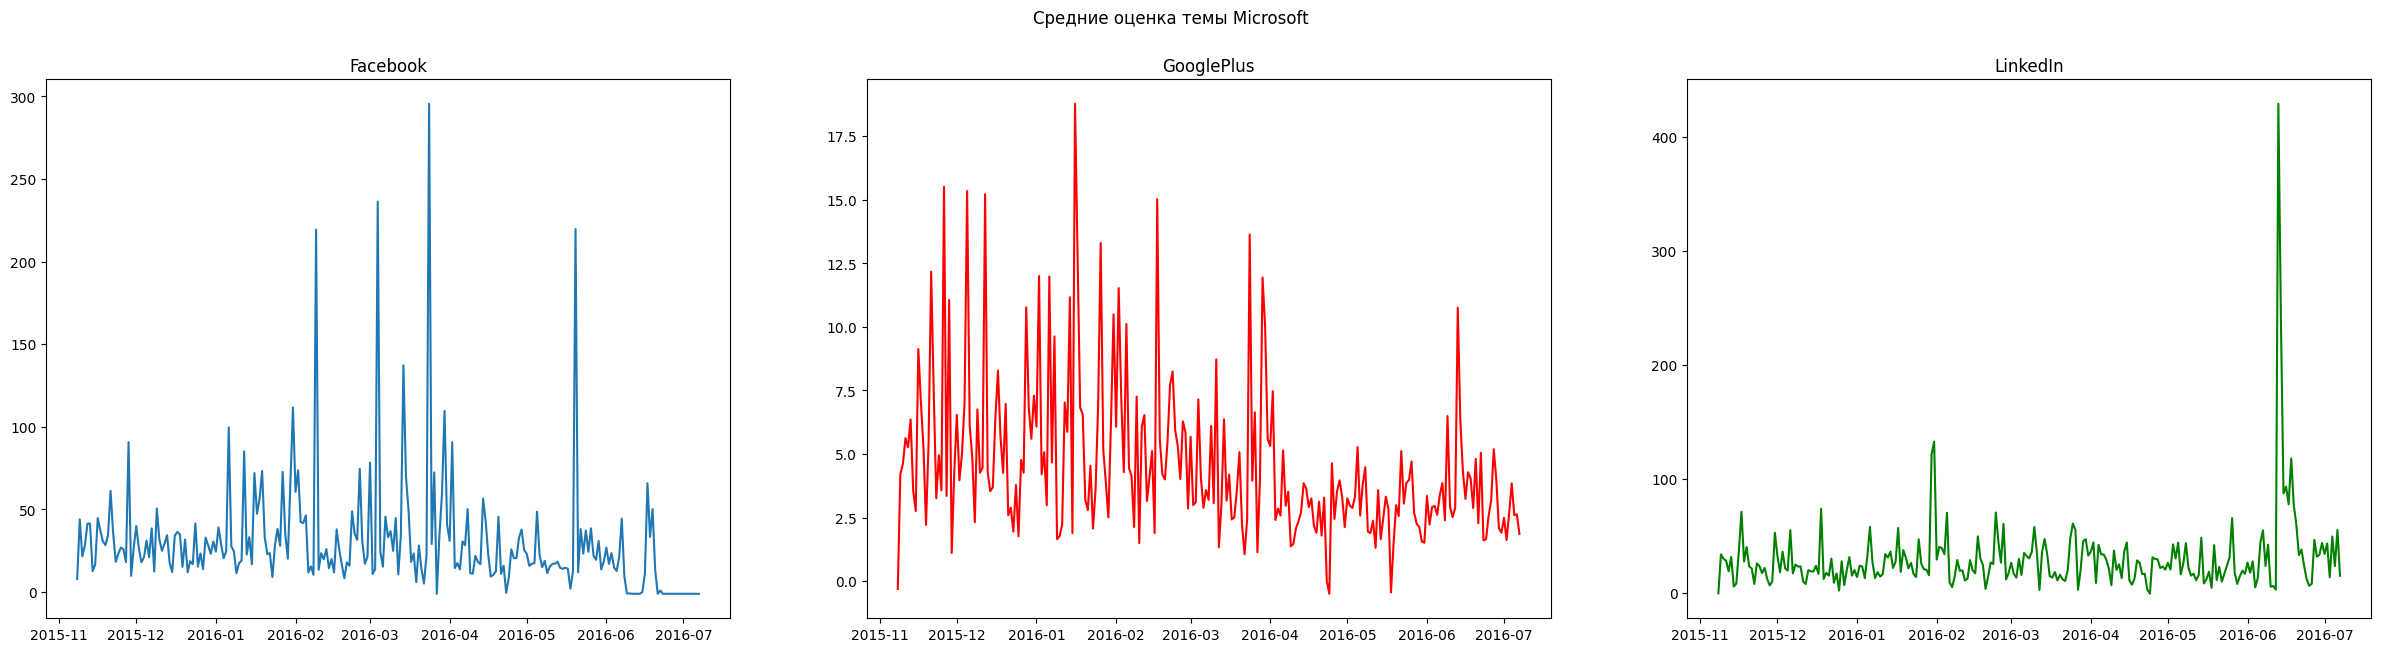

In [17]:
news_microsoft_date = news_microsoft.groupby(['PublishDate']).agg({'Facebook': 'mean', 'GooglePlus': 'mean', 'LinkedIn': 'mean'}).reset_index()
news_microsoft_date

plt.figure(figsize=(30, 7))
plt.suptitle('Средние оценка темы Microsoft')

plt.subplot(1, 3, 1)
plt.plot(news_microsoft_date['PublishDate'], news_microsoft_date['Facebook'])
plt.title('Facebook')

plt.subplot(1, 3, 2)
plt.plot(news_microsoft_date['PublishDate'], news_microsoft_date['GooglePlus'], c='r')
plt.title('GooglePlus')

plt.subplot(1, 3, 3)
plt.plot(news_microsoft_date['PublishDate'], news_microsoft_date['LinkedIn'], c='g')
plt.title('LinkedIn')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

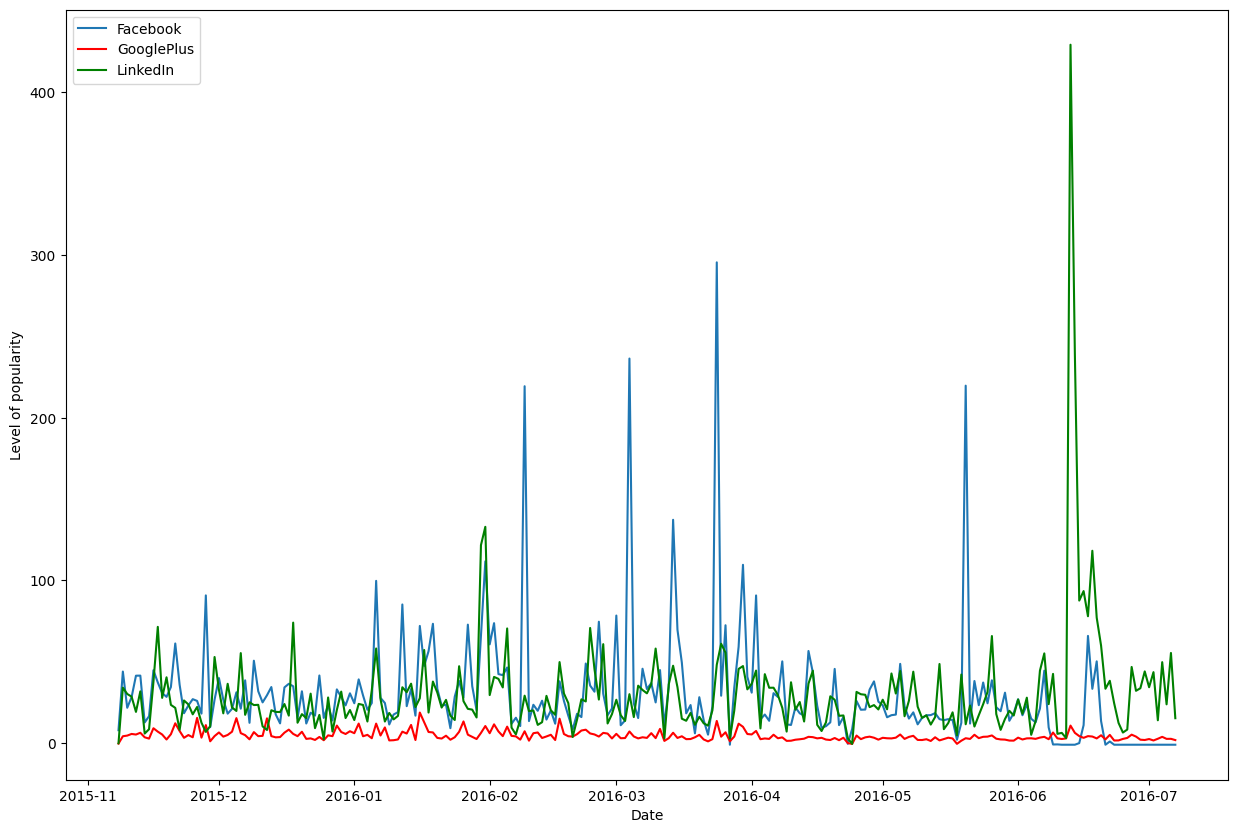

In [21]:
plt.figure(figsize=[15,10])
plt.plot(news_microsoft_date['PublishDate'], news_microsoft_date['Facebook'], label='Facebook')
plt.plot(news_microsoft_date['PublishDate'], news_microsoft_date['GooglePlus'], c='r', label='GooglePlus')
plt.plot(news_microsoft_date['PublishDate'], news_microsoft_date['LinkedIn'], c='g', label='LinkedIn')
plt.xlabel('Date')
plt.ylabel('Level of popularity')
plt.legend(loc='upper left')
plt.show

Text(0.5, 1.0, 'LinkedIn')

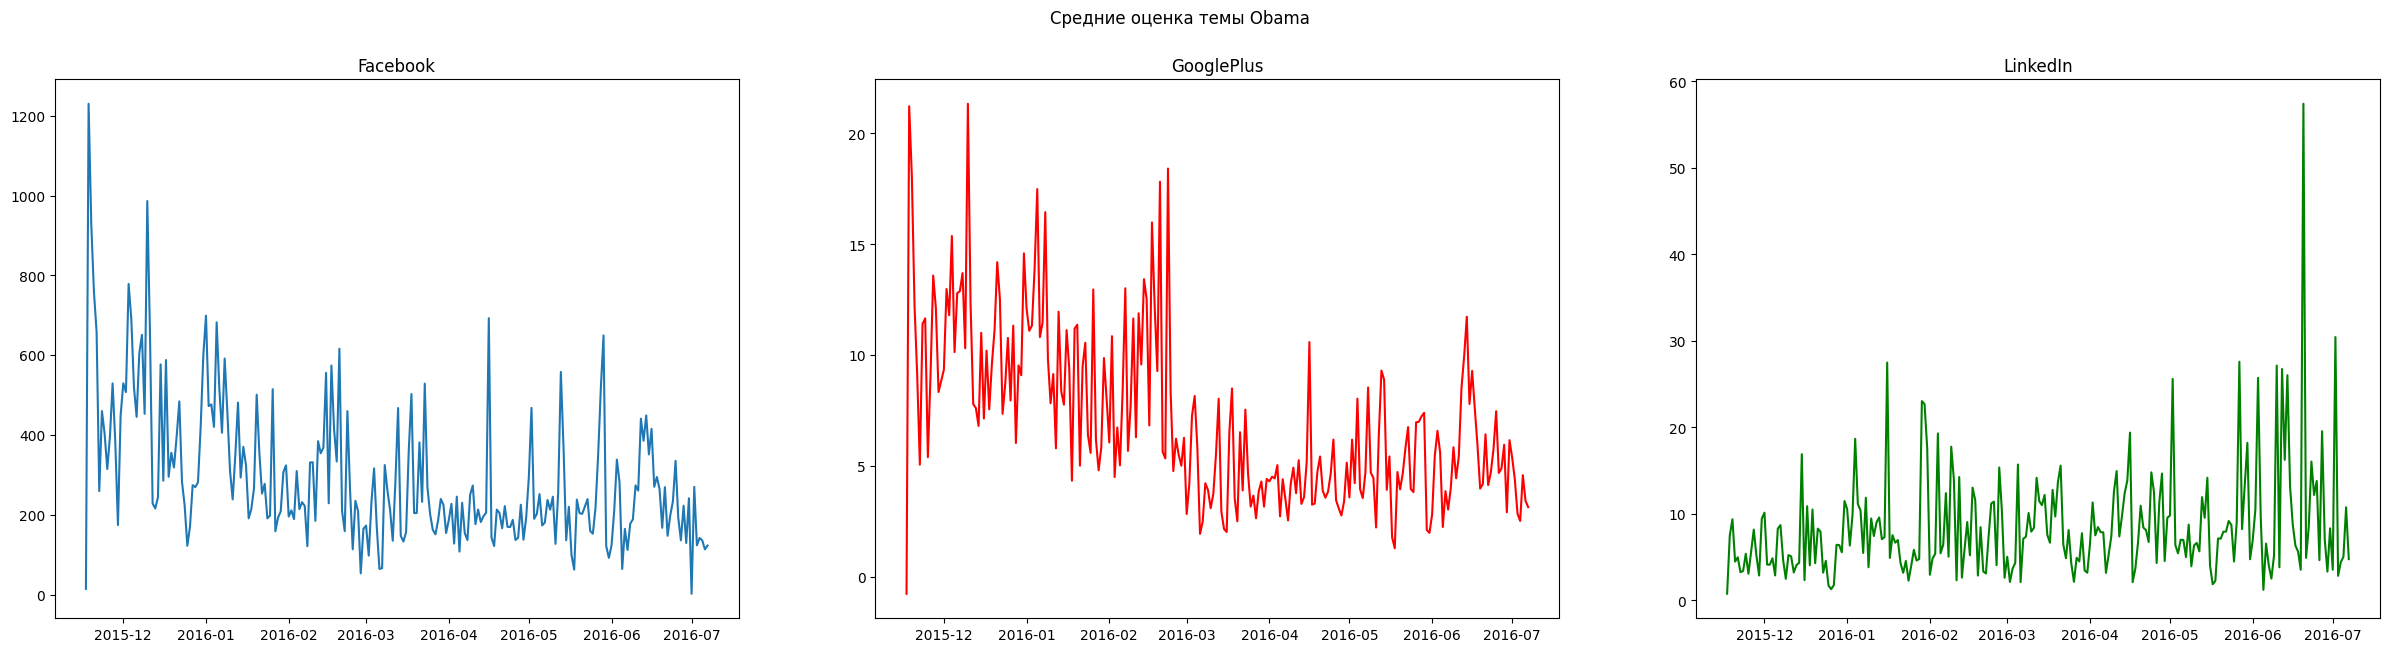

In [29]:
news_obama_date = news_obama.groupby(['PublishDate']).agg({'Facebook': 'mean', 'GooglePlus': 'mean', 'LinkedIn': 'mean'}).reset_index()
news_obama_date

plt.figure(figsize=(30, 7))
plt.suptitle('Средние оценка темы Obama')

plt.subplot(1, 3, 1)
plt.plot(news_obama_date['PublishDate'], news_obama_date['Facebook'])
plt.title('Facebook')

plt.subplot(1, 3, 2)
plt.plot(news_obama_date['PublishDate'], news_obama_date['GooglePlus'], c='r')
plt.title('GooglePlus')

plt.subplot(1, 3, 3)
plt.plot(news_obama_date['PublishDate'], news_obama_date['LinkedIn'], c='g')
plt.title('LinkedIn')

<function matplotlib.pyplot.show(close=None, block=None)>

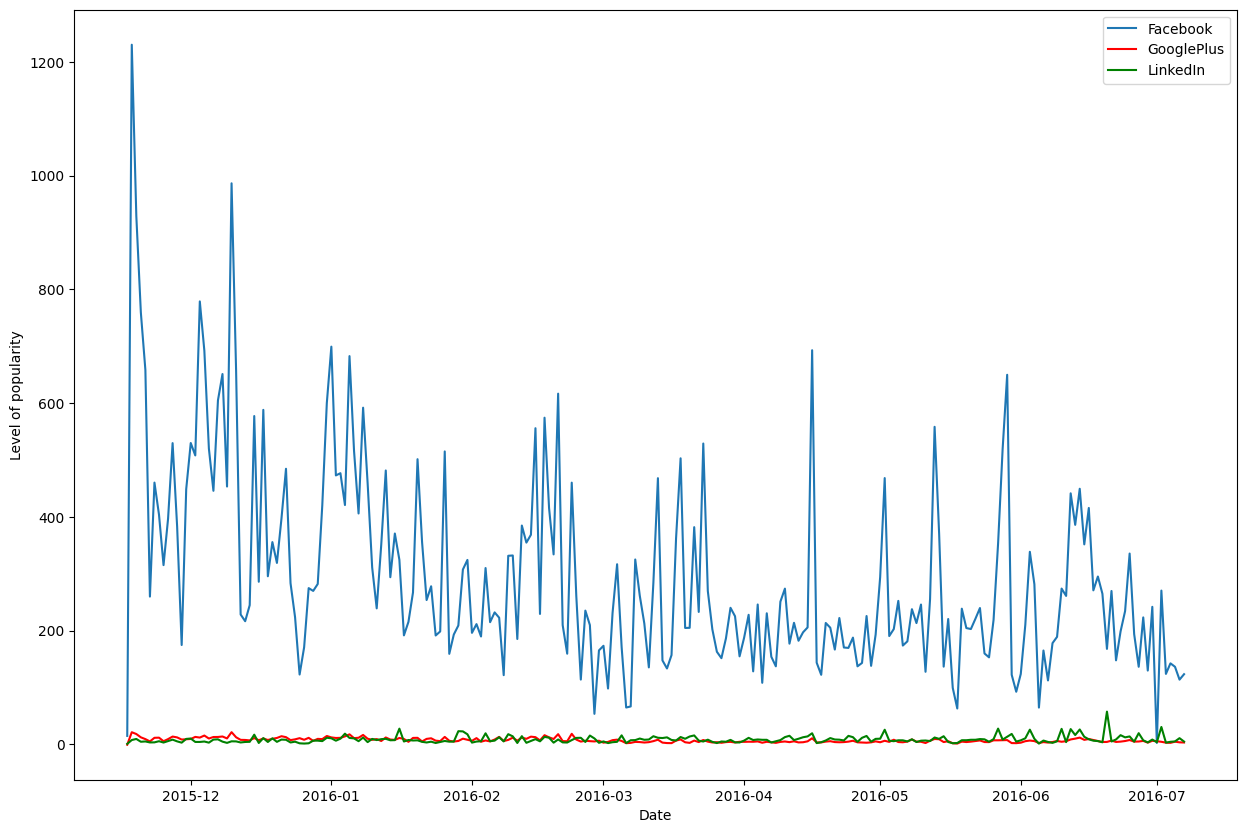

In [24]:
plt.figure(figsize=[15,10])
plt.plot(news_obama_date['PublishDate'], news_obama_date['Facebook'], label='Facebook')
plt.plot(news_obama_date['PublishDate'], news_obama_date['GooglePlus'], c='r', label='GooglePlus')
plt.plot(news_obama_date['PublishDate'], news_obama_date['LinkedIn'], c='g', label='LinkedIn')
plt.xlabel('Date')
plt.ylabel('Level of popularity')
plt.legend(loc='upper right')
plt.show

Text(0.5, 1.0, 'LinkedIn')

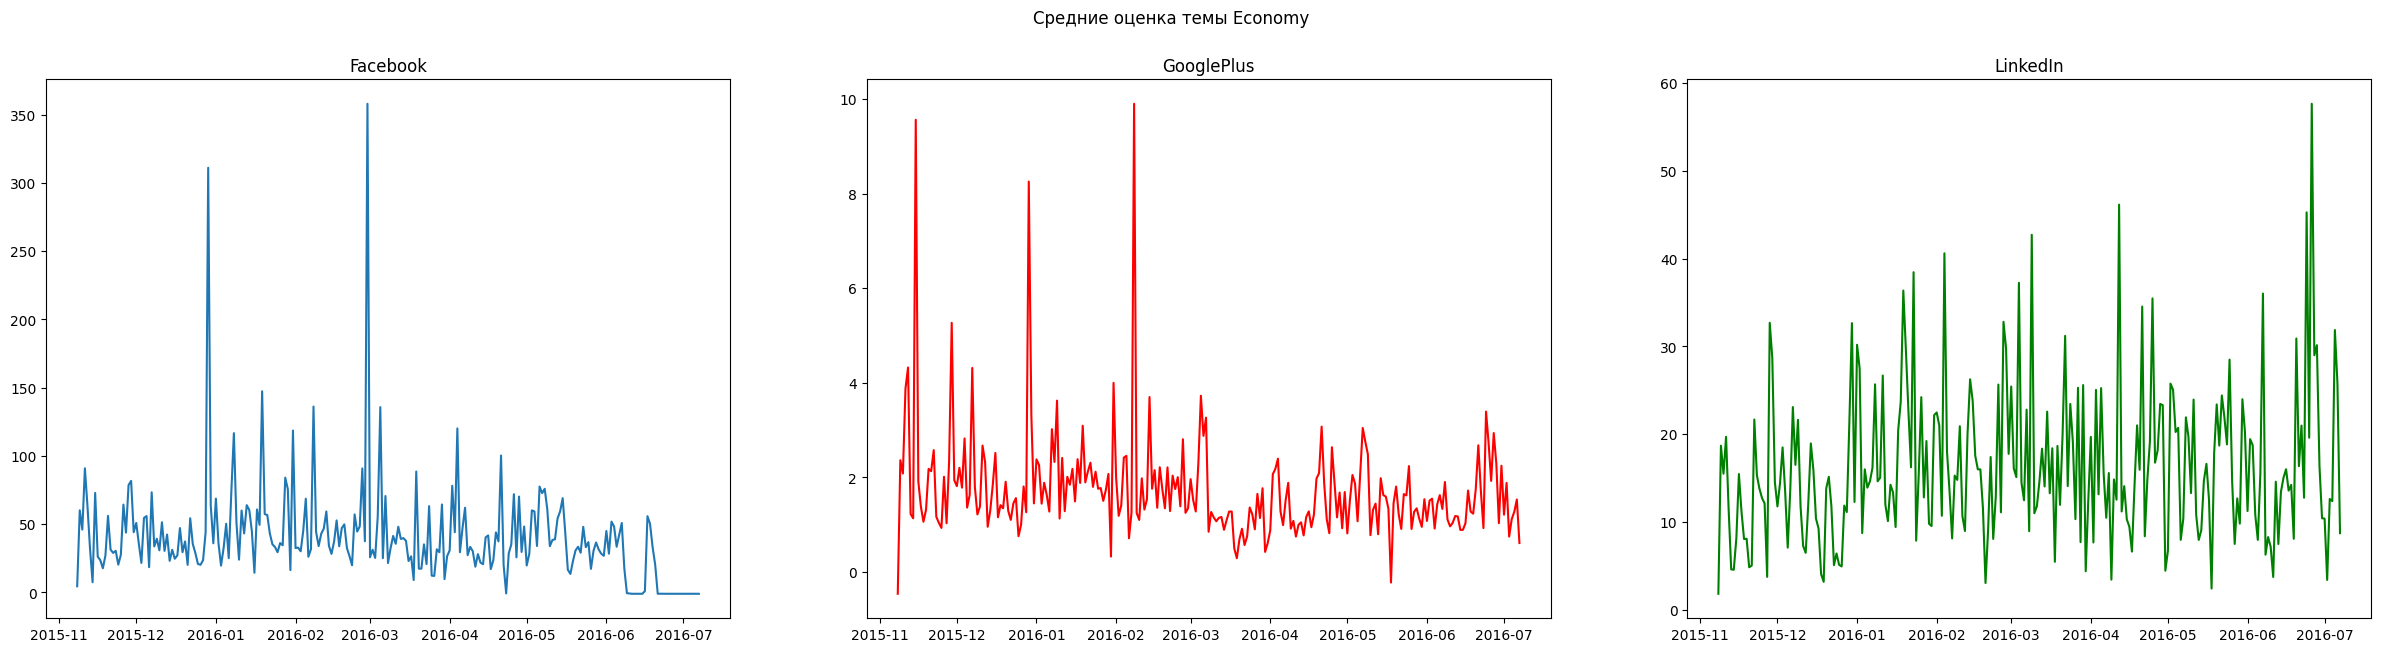

In [30]:
news_economy_date = news_economy.groupby(['PublishDate']).agg({'Facebook': 'mean', 'GooglePlus': 'mean', 'LinkedIn': 'mean'}).reset_index()
news_economy_date

plt.figure(figsize=(30, 7))
plt.suptitle('Средние оценка темы Economy')

plt.subplot(1, 3, 1)
plt.plot(news_economy_date['PublishDate'], news_economy_date['Facebook'])
plt.title('Facebook')

plt.subplot(1, 3, 2)
plt.plot(news_economy_date['PublishDate'], news_economy_date['GooglePlus'], c='r')
plt.title('GooglePlus')

plt.subplot(1, 3, 3)
plt.plot(news_economy_date['PublishDate'], news_economy_date['LinkedIn'], c='g')
plt.title('LinkedIn')

<function matplotlib.pyplot.show(close=None, block=None)>

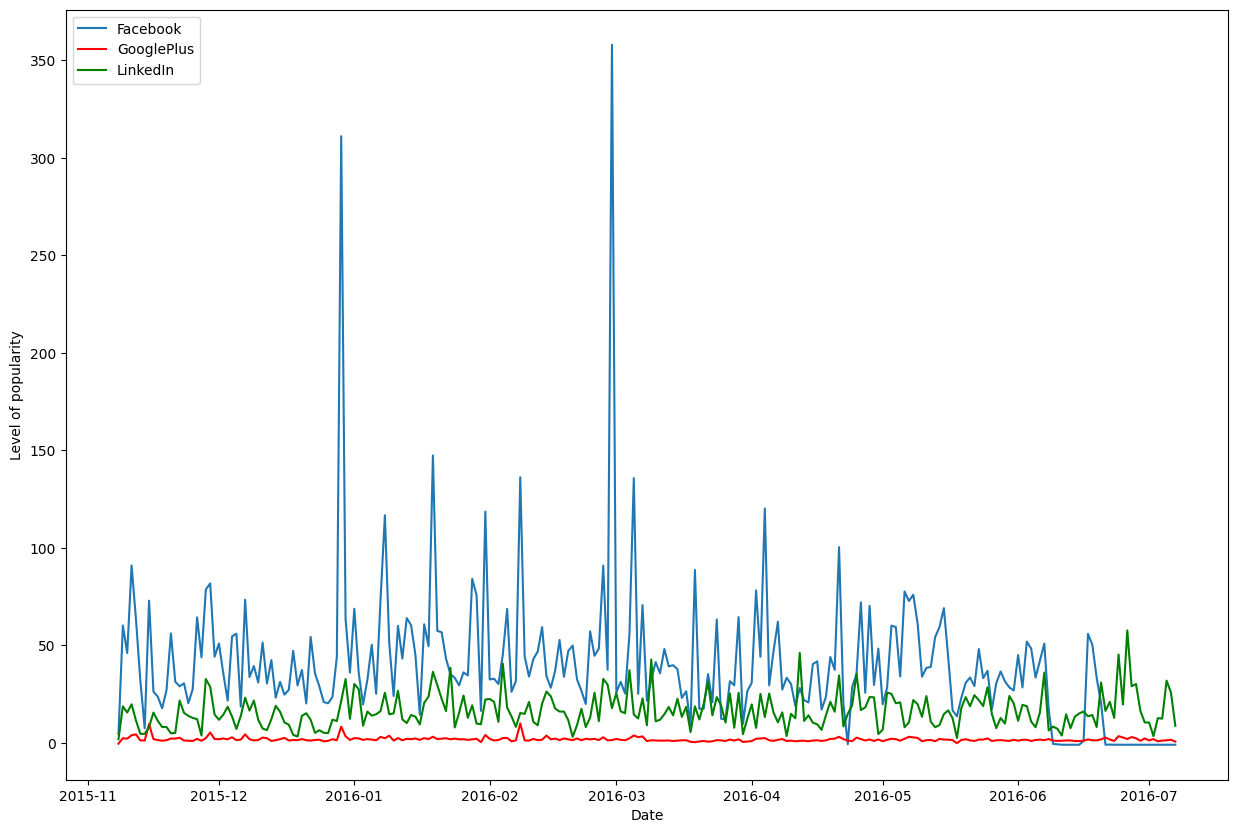

In [27]:
plt.figure(figsize=[15,10])
plt.plot(news_economy_date['PublishDate'], news_economy_date['Facebook'], label='Facebook')
plt.plot(news_economy_date['PublishDate'], news_economy_date['GooglePlus'], c='r', label='GooglePlus')
plt.plot(news_economy_date['PublishDate'], news_economy_date['LinkedIn'], c='g', label='LinkedIn')
plt.xlabel('Date')
plt.ylabel('Level of popularity')
plt.legend(loc='upper left')
plt.show

Text(0.5, 1.0, 'LinkedIn')

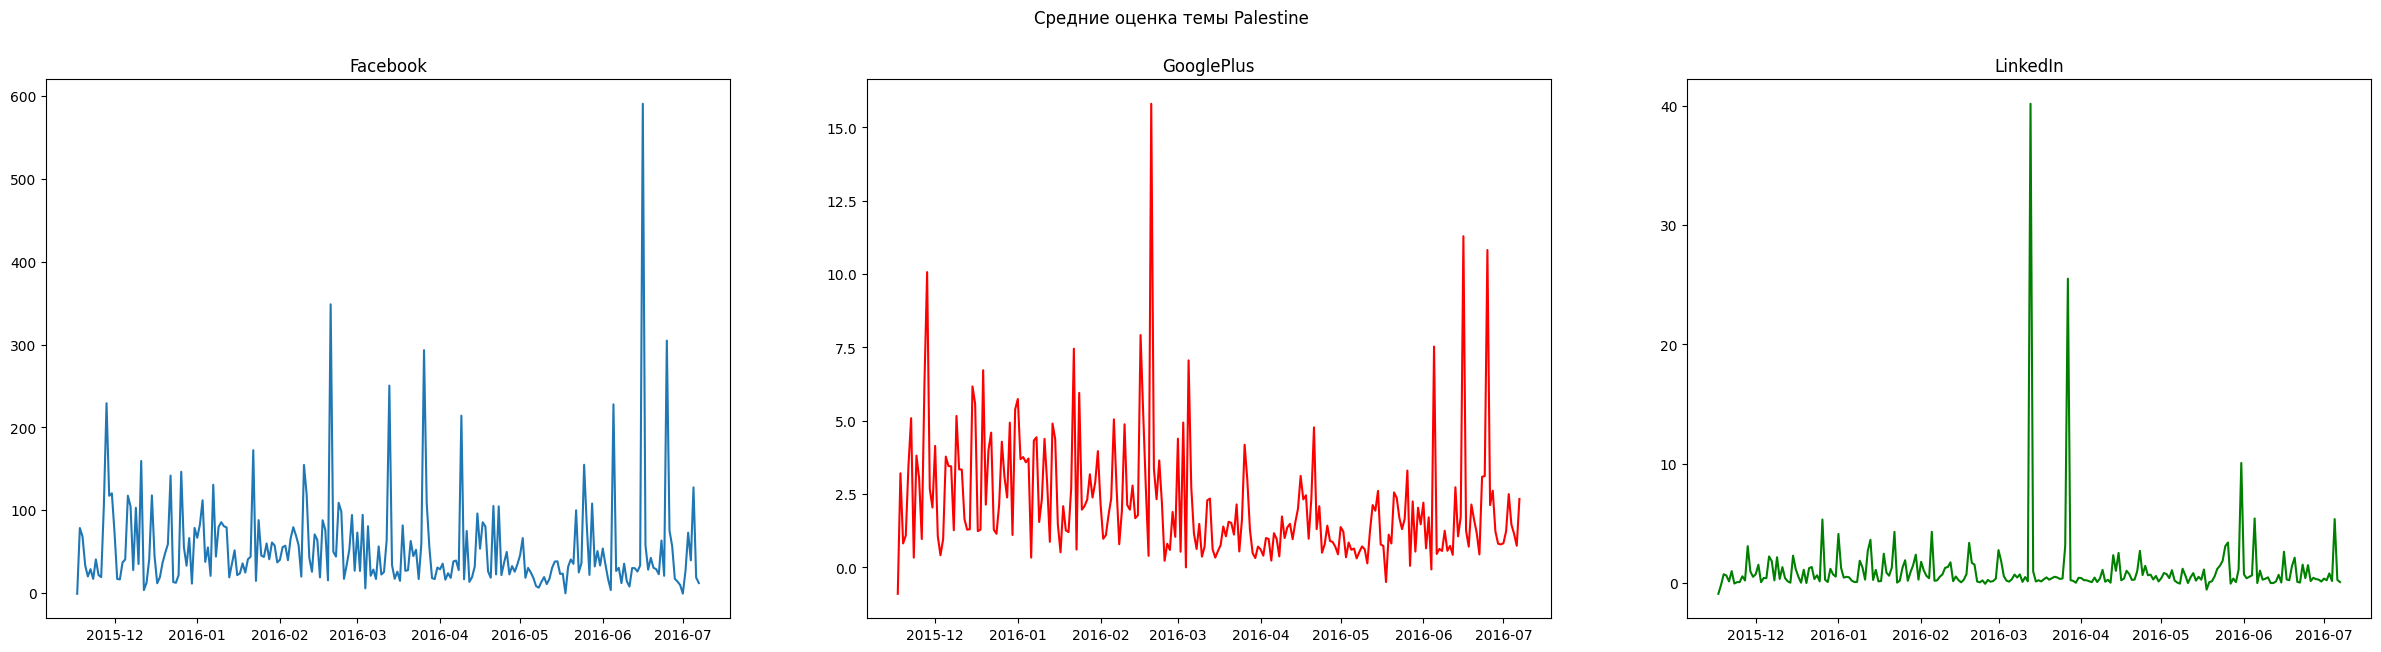

In [31]:
news_palestine_date = news_palestine.groupby(['PublishDate']).agg({'Facebook': 'mean', 'GooglePlus': 'mean', 'LinkedIn': 'mean'}).reset_index()
news_palestine_date

plt.figure(figsize=(30, 7))
plt.suptitle('Средние оценка темы Palestine')

plt.subplot(1, 3, 1)
plt.plot(news_palestine_date['PublishDate'], news_palestine_date['Facebook'])
plt.title('Facebook')

plt.subplot(1, 3, 2)
plt.plot(news_palestine_date['PublishDate'], news_palestine_date['GooglePlus'], c='r')
plt.title('GooglePlus')

plt.subplot(1, 3, 3)
plt.plot(news_palestine_date['PublishDate'], news_palestine_date['LinkedIn'], c='g')
plt.title('LinkedIn')

<function matplotlib.pyplot.show(close=None, block=None)>

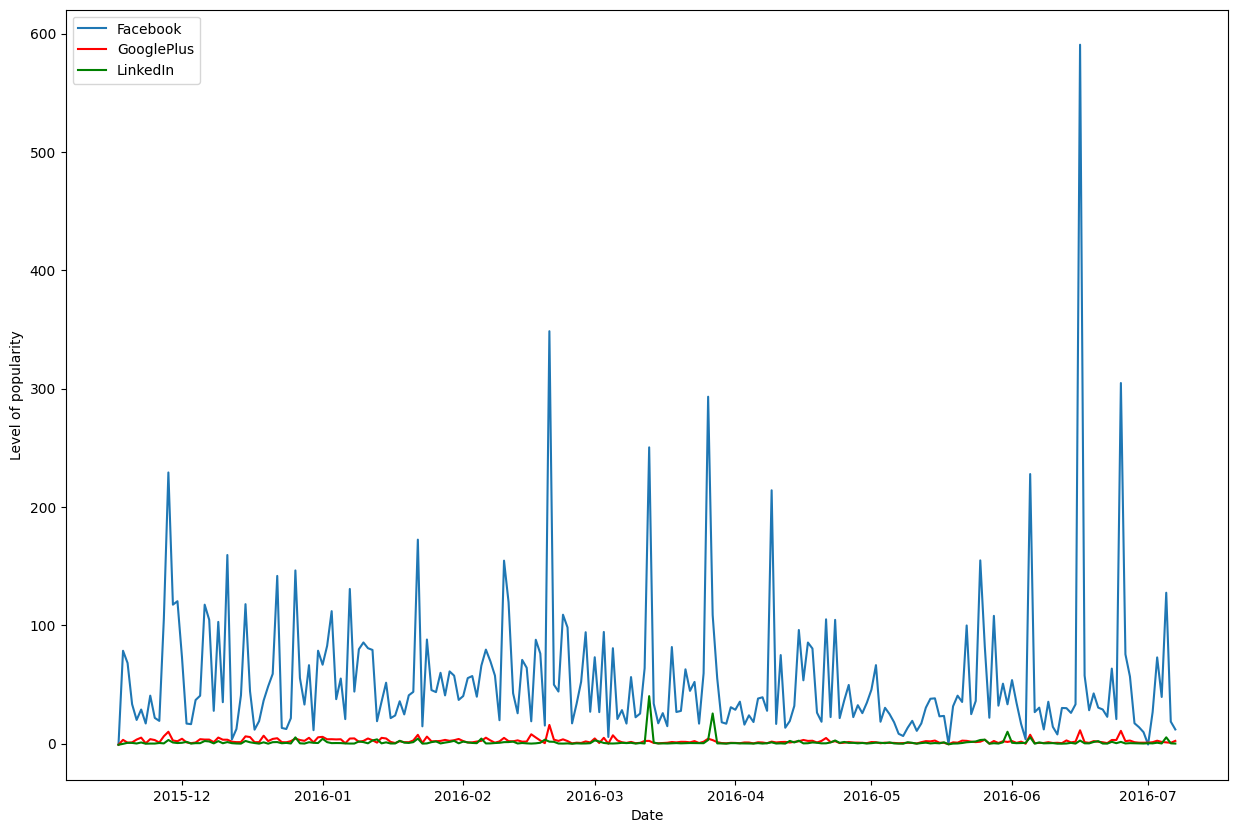

In [32]:
plt.figure(figsize=[15,10])
plt.plot(news_palestine_date['PublishDate'], news_palestine_date['Facebook'], label='Facebook')
plt.plot(news_palestine_date['PublishDate'], news_palestine_date['GooglePlus'], c='r', label='GooglePlus')
plt.plot(news_palestine_date['PublishDate'], news_palestine_date['LinkedIn'], c='g', label='LinkedIn')
plt.xlabel('Date')
plt.ylabel('Level of popularity')
plt.legend(loc='upper left')
plt.show

Исходя из графиков, мы можем наглядно наблюдать что новости по всем темам придаются более широкой огласке и оцениваются высоко в Facebook